In [1]:
!pip install diffrax
!pip install orthojax --upgrade
!pip install git+https://github.com/PredictiveScienceLab/py-design

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalle

# Homework 3

## References

+ Module 3: Uncertainty Propagation Through Scientific Models
    - Polynomial chaos

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name:** Seth
+ **Last Name:** Honnigford
+ **Email:** shonnigf@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):** Yes
+ **Which generative AI tool did you use (if applicable)?:** DeepSeek

# Problem 1 - The Pythagorean theorem on Hilbert Spaces

Let $H$ be a Hilbert space with inner product $\langle \cdot, \cdot \rangle$ and norm $\| \cdot \|$. Let $x, y \in H$.

## Part A
Prove that if $x$ and $y$ are orthogonal, then the Pythagorean theorem holds, i.e.,

$$
\| x + y \|^2 = \| x \|^2 + \| y \|^2.
$$

*Hint:* Use the fact that $\| x + y \|^2 = \langle x + y, x + y \rangle$.

**Answer:**

We start with:

$$
\| x + y \|^2 = \langle x + y, x + y \rangle
$$

The inner product of $x + y$ with itself can be expanded:

$$
\langle x + y, x + y \rangle = \langle x, x \rangle + \langle x, y \rangle + \langle y, x \rangle + \langle y, y \rangle
$$

However, since $x$ and $y$ are orthogonal, $\langle x, y \rangle$, and $\langle y, x \rangle$ are both equal to 0.

So we are left with:

$$
\langle x + y, x + y \rangle = \langle x, x \rangle + \langle y, y \rangle
$$

Using the fact that $\langle x, x \rangle = \|x \|^2$, and $\langle y, y \rangle = \|y \|^2$ in conjunction with the first line, we get:

$$
\|x + y \|^2 = \|x \|^2 + \|y \|^2
$$

This proves that the pythagorean theorem holds as long as x and y are orthogonal.

## Part B

Prove the following generalization of the Pythagorean theorem.
Let $x_1,x_2,\dots,x_n \in H$ be pairwise orthogonal, i.e., $\langle x_i, x_j \rangle = 0$ for all $i \neq j$. Then,

$$
\| x_1 + x_2 + \dots + x_n \|^2 = \| x_1 \|^2 + \| x_2 \|^2 + \dots + \| x_n \|^2.
$$

*Hint:* Use induction and the result from Part A.

**Answer:**

Since we know a base case of $n = 2$ as shown in part A, all that is needed for induction is to prove the $n = k + 1$ case.

We first assume that the $n = k$ case is true. Let $S = x_1 + x_2 + \dots + x_k$. Now using the same trick as in part A:

$$
\|S + x_{k+1} \|^2 = \langle S + x_{k+1}, S + x_{k+1} \rangle
$$

Expanding the inner product:

$$
\langle S + x_{k+1}, S + x_{k+1} \rangle = \langle S, S \rangle + \langle S, x_{k+1} \rangle + \langle x_{k+1}, S \rangle + \langle x_{k+1}, x_{k+1} \rangle
$$

Since $S$ and $x_{k+1}$ are orthogonal, we can simplify this to:

$$
\|S + x_{k+1} \|^2 = \langle S + x_{k+1}, S + x_{k+1} \rangle = \langle S, S \rangle + \langle x_{k+1}, x_{k+1} \rangle
$$

It follows:

$$
\|S + x_{k+1} \|^2 = \|S \|^2 + \|x_{k+1} \|^2
$$

Substituting $x_1 + x_2 + \dots + x_k$ for $S$:

$$
\|x_1 + x_2 + \dots + x_k + x_{k+1} \|^2 = \|x_1 + x_2 + \dots + x_k \|^2 + \|x_{k+1} \|^2
$$

And since we assumed the case $n = k$ to be true, that means:

$$
\|x_1 + x_2 + \dots + x_k \|^2 = \|x_1 \|^2 + \|x_2 \|^2 + \dots + \|x_k \|^2
$$

And so it follows that:

$$
\|x_1 + x_2 + \dots + x_k + x_{k+1} \|^2 = \|x_1 \|^2 + \|x_2 \|^2 + \dots + \|x_k \|^2 + \|x_{k+1} \|^2
$$

Thus proving the generalization of the pythagorean theorem by use of induction.

# Problem 2 - All infinite dimensional separable Hilbert spaces are isomorphic to $\ell^2$

An infinite dimensional Hilbert space $H$ are isomorphic to $\ell^2$, the space of square summable sequences of real numbers. In this problem we will prove this result.
Intuitively, this means that we can think of vectors in $H$ as infinite dimensional vectors in $\ell^2$.
It is as if the space $H$ is a relabeling of the space $\ell^2$.
First, recall that

$$
\ell^2 = \left\{ a = (a_1, a_2, \dots) \mid \sum_{i=1}^\infty |a_i|^2 < \infty \right\}.
$$

The innner product in $\ell^2$ is given by

$$
\langle a, b \rangle_{\ell^2} = \sum_{i=1}^\infty a_i b_i,
$$

for all $a, b \in \ell^2$.

To show that two spaces are isomorphic, we need to show that there exists a bijective linear map between them which keeps the inner product intact.
Bijection means that the map is one-to-one and onto.
So, we need to find an invertible, linear map:

$$
T: H \to \ell^2.
$$

To keep the inner product intact, we need to show that for all $x, y \in H$,

$$
\langle x, y \rangle = \langle T(x), T(y) \rangle_{\ell^2}.
$$

Here, on the left we have the inner product in $H$ and on the right we have the inner product in $\ell^2$.
If the inner products are intact, orthogonality is preserved by $T$.
And also norms are preserved, since $\| x \| = \sqrt{\langle x, x \rangle}$.

Okay, this is what you will have to do.
I will give you the right $T$ and you will have to show that it is linear, invertible, and keeps the inner product intact.

Recall that since $H$ is separable, it has a countable orthonormal basis $\{ e_1, e_2, \dots \}$.
This means that every vector $x \in H$ can be written as

$$
    x = \sum_{i=1}^\infty \langle x, e_i \rangle e_i.
$$

The idea is to use the Fourier coefficients $\langle x, e_i \rangle$ as the entries of the vector $T(x)$, i.e., we define:

$$
T(x) = ( \langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots ).
$$

## Part A

Show that $T(x)$ is indeed in $\ell^2$ for all $x \in H$. That is, show that $\sum_{i=1}^\infty |\langle x, e_i \rangle|^2 < \infty$.

*Hint:* Use Parseval's identity.

**Answer:**

We first start with Parseval's identity which states that for any $x \in H$, the sum of the squares of the sum of the squares of the absolute values of the Fourier coefficients is equal to the square of the norm of x, or:

$$
\sum_{i=1}^{\infty} | \langle x, e_i \rangle |^2 = \|x \|^2
$$

Since $x$ is an element the Hilbert space $H$, that means that $\| x \|^2$ must be finite. So therefore:

$$
\sum_{i=1}^{\infty} | \langle x, e_i \rangle |^2 = \|x \|^2 < \infty
$$

## Part B

Show that $T$ is a linear map, i.e., show that for all $x, y \in H$ and $\alpha, \beta \in \mathbb{R}$,

$$
T(\alpha x + \beta y) = \alpha T(x) + \beta T(y).
$$

**Answer:**

Since $H$ is separable:

$$
T(\alpha x + \beta y) = (\langle \alpha x + \beta y, e_1 \rangle, \langle \alpha x + \beta y, e_2 \rangle, \dots) = (\langle \alpha x, e_1 \rangle + \langle \beta y, e_1 \rangle, \langle \alpha x, e_2 \rangle + \langle \beta y, e_2 \rangle, \dots) = T(\alpha x) + T(\beta y)
$$

For $T(\alpha x)$, since $\alpha$ is a real number:

$$
T(\alpha x) = (\langle \alpha x, e_1 \rangle, \langle \alpha x, e_2 \rangle, \dots) = (\alpha \langle x, e_1 \rangle, \alpha \langle x, e_2 \rangle, \dots) = \alpha T(x)
$$

For $T(\beta y)$, since $\beta$ is a real number:

$$
T(\beta y) = (\langle \beta y, e_1 \rangle, \langle \beta y, e_2 \rangle, \dots) = (\beta \langle y, e_1 \rangle, \beta \langle y, e_2 \rangle, \dots) = \beta T(y)
$$

Thus:

$$
T(\alpha x + \beta y) = \alpha T(x) + \beta T(y)
$$

## Part C

Show that $T$ is onto.

*Hint:* Take a vector $a \in \ell^2$ and show that there exists a vector $x \in H$ such that $T(x) = a$. Just try to write down the vector $x$ in terms of $a$ and the orthonormal basis $\{ e_1, e_2, \dots \}$.

**Answer:**

Let $x \in H$ and:

$$
x = \sum_{i=1}^\infty a_i e_i
$$

Then for all $j \in \N$, and since $\{e_i\}$ is orthonormal:

$$
\langle x, e_j \rangle = \langle \sum_{i=1}^\infty a_i e_i, e_j \rangle = \sum_{i=1}^\infty a_i \langle e_i, e_j \rangle = a_j
$$

Now:

$$
T(x) = (\langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots) = (a_1, a_2, \dots) = a

## Part D

Show that $T$ is one-to-one.

*Hint:* Take two vectors $x, y \in H$ and show that if $T(x) = T(y)$, then $x = y$.

**Answer:**

We start with $T(x) = T(y)$, then, by definition:

$$
(\langle x, e_1 \rangle, \langle x, e_2 \rangle, \dots) = (\langle y, e_1 \rangle, \langle y, e_2 \rangle, \dots)
$$

Since $\{e_i\}$ is orthonormal:

$$
\langle x, e_i \rangle = \langle y, e_i \rangle
$$

For all $i \in \N$.

This implies:

$$
\sum_{i=1}^\infty \langle x, e_i \rangle e_i = \sum_{i=1}^\infty \langle y, e_i \rangle e_i
$$

And since $H$ is separable, this means that:

$$
x = y
$$

## Part E

Show that $T$ keeps the inner product intact. That is, show that for all $x, y \in H$,

$$
\langle x, y \rangle = \langle T(x), T(y) \rangle_{\ell^2}.
$$

*Hint:* Use the fact that $T$ is linear and the definition of $T$. The inner product of two vectors in $\ell^2$ is defined as $\langle a, b \rangle_{\ell^2} = \sum_{i=1}^\infty a_i b_i$.

**Answer:**

We start with the definition of the inner product and of $T(x)$:

$$
\langle T(x), T(y) \rangle_{l^2} = \sum_{i=1}^\infty (\langle x, e_i \rangle, \langle y, e_i \rangle)
$$

Then, using Parseval's identity:

$$
\sum_{i=1}^\infty (\langle x, e_i \rangle, \langle y, e_i \rangle) = \langle x, y \rangle
$$

Which leaves us with:

$$
\langle T(x), T(y) \rangle_{l^2} = \sum_{i=1}^\infty (\langle x, e_i \rangle, \langle y, e_i \rangle) = \langle x, y \rangle
$$

# Problem 3 - Numerical Construction of Polynomial Chaos

Through this problem, you are going to construct orthogonal polynomials for the exponential distribution and test a few things with them.
You need to familiarize yourself with [this hands-on-activity](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/up/polynomial_chaos/04_orthpol_demo.html) before you proceed.

## Part A

Consider the random variable:

$$
\Xi \sim \exp(1).
$$

The exponential distribution has the following probability density function:

$$
f_\Xi(\xi) = \begin{cases}
e^{-\xi} & \xi \geq 0 \\
0 & \xi < 0
\end{cases}.
$$

Use the `orthojax` package to construct the first 5 orthogonal polynomials for $\Xi$.
Plot them on the same figure for $\xi \in [0, 5]$.

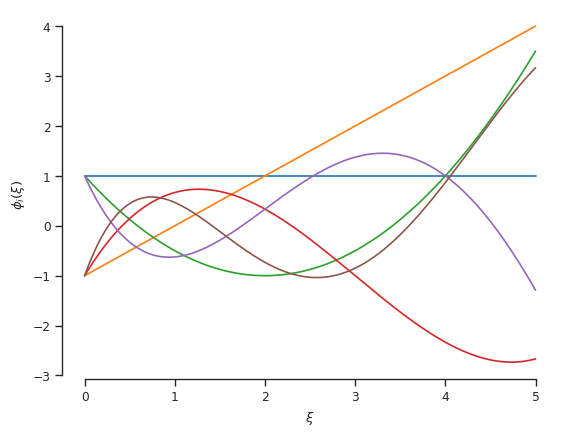

In [2]:
# your code here
# Hint: You can use the function orthojax.make_orthogonal_polynomial
# but you need to pass the argument right=jnp.inf to indicate that
# the right endpoint is infinity.

import orthojax as ojax
import jax.numpy as jnp

degree = 5
pdf = lambda xi: jnp.exp(-xi)

poly = ojax.make_orthogonal_polynomial(
    degree,
    left=0.0,          # Left endpoint of domain
    right=jnp.inf,     # Right endpoint (infinity)
    wf=pdf
)

xis = jnp.linspace(0.0, 5.0, 200)
phi = poly(xis)

fig, ax = plt.subplots()
ax.plot(xis, phi)
ax.set(xlabel=r"$\xi$", ylabel=r"$\phi_i(\xi)$")
sns.despine(trim=True)

# Your code here

## Part B

Project the function:

$$
f(\xi) = \sin(x)
$$

onto the first 5 orthogonal polynomials for $\Xi$. Plot the function $f$ and its projection on the same figure for $\xi \in [0, 5]$.

*Hint:* Do exactly what I do in the activity. You need to extract from `poly` the quadrature rule so that you can do the inner product.

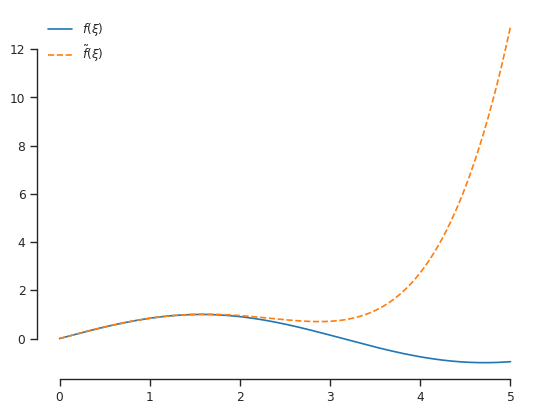

In [3]:
# Your code here

poly = ojax.make_legendre_polynomial(degree).normalize()
x, w = poly.quad

# Just a function to project
f = lambda x: jnp.sin(x)

# The projection
proj = jnp.einsum("i,ij,i->j", f(x), poly(x), w)

proj_f = lambda xi: jnp.einsum("k,ik->i", proj, poly(xi))

xis = jnp.linspace(0, 5.0, 200)
fig, ax = plt.subplots()
ax.plot(xis, f(xis), label=r"$f(\xi)$")
ax.plot(xis, proj_f(xis), label=r"$\tilde{f}(\xi)$", linestyle='--')
ax.legend(loc="best", frameon=False)
sns.despine(trim=True)

## Part C

Use the polynomial projection to calculate the mean and variance of the random variable

$$
Y = f(\Xi) = \sin(\Xi).
$$

Compare to Monte Carlo estimates or the exact values.

In [4]:
# Your code here

mean = proj[0]
print(f"mean: {mean}")

var = jnp.sum(proj[1:] ** 2)
print(f"variance: {var}")

mean: -1.2683383232570122e-09
variance: 0.2726832628250122


In [5]:
import numpy as np

xis = np.random.randn(10_000)
samples = f(xis)
mc_mean = np.mean(samples)
mc_var = np.var(samples)
print(f"MC mean: {mc_mean}")
print(f"MC variance: {mc_var}")

MC mean: 0.0044199638068675995
MC variance: 0.4343055784702301


# Problem 4 - Uncertainty Propagation with Polynomial Chaos

Consider the Lorenz system:

$$
\begin{align*}
\dot{x} &= \sigma(y-x),\\
\dot{y} &= x(\rho-z)-y,\\
\dot{z} &= xy-\beta z,
\end{align*}
$$

with parameters $\sigma=10$, $\beta=8/3$, and $\rho=28$.
Take the initial conditions to be random:

$$
\begin{align*}
x(0) &\sim \mathcal{N}(0, 0.01),\\
y(0) &\sim \mathcal{N}(0, 0.01),\\
z(0) &\sim \mathcal{N}(0, 0.01).
\end{align*}
$$

Use may reuse code from [this hands-on activity](https://predictivesciencelab.github.io/advanced-scientific-machine-learning/up/polynomial_chaos/07_pce_dynamical_system.html).

## Part A - Build a Polynomial Chaos Surrogate

Build a polynomial chaos surrogate. Calculate the mean and the variance as a function of time. Compare the result to Monte Carlo estimates.

In [22]:
# Your code here

from collections import namedtuple
import orthojax as ojax
import jax.numpy as jnp
import design
from jax import vmap, jit


def make_sparse_grid(dim, level):
    """Make a sparse grid of dimension dim and a given level.
    We do it for the uniform cube [-1, 1]^d."""
    x, w = design.sparse_grid(dim, level, 'F2')
    w = w / (2 ** dim)
    x = jnp.array(x, dtype=jnp.float32)
    w = jnp.array(w, dtype=jnp.float32)
    return ojax.QuadratureRule(x, w)


PCProblem = namedtuple("PCProblem", ["poly", "quad", "f", "x0", "phis", "y0", "rhs"])


def make_pc_problem(poly, quad, f, x0):
    """Make the PC dynamical system problem.

    Params:
        poly: The polynomial basis
        quad: The quadrature rule used to compute inner products
        f: The function defining the right hand side of the ODE (function of x, t and xi) to R^n
        x0: The initial condition (function of xi, from R^d -> R^n)
        theta: The parameters of the ODE
    """
    # The quadrature rule used to compute inner products
    xis, ws = quad
    # xis is m x d and ws is m

    # The polynomial basis functions on the collocation points
    phis = poly(xis)
    # this is m x p

    # The initial condition of the PC coefficients
    x0s = jit(vmap(x0))(xis) # this is m x n
    # The PC coefficients are n x p
    # ws is m
    # phis is m x p
    # x0s is m x n
    # y0 must be n x p
    y0 = jnp.einsum("m,mp,mn->np", ws, phis, x0s)

    # Vectorize the function f
    fv = vmap(f, in_axes=(None, 0, 0))

    # The right hand side of the PC ODE
    def rhs(t, y, phis):
        # y is n x p
        # phis is m x p
        # xs must be m x n
        xs = jnp.einsum("np,mp->mn", y, phis)
        # xs is m x n
        # xis is m x d
        # fs must be m x n
        fs = fv(t, xs, xis)
        # do the dot product with quadrature weights
        return jnp.einsum("m,mn,mp->np", ws, fs, phis)

    return PCProblem(poly, quad, f, x0, phis, y0, rhs)

In [23]:
# Your code here
import equinox as eqx
from collections import namedtuple

NormalDistribution = namedtuple("NormalDistribution", ["mu", "sigma"])
Parameters = namedtuple("Parameters", ["sigma", "beta", "rho"])

Lorenz = namedtuple("Lorenz", ["params", "X", "Y", "Z"])

In [24]:
X = NormalDistribution(0.0, 0.01)
Y = NormalDistribution(0.0, 0.01)
Z = NormalDistribution(0.0, 0.01)

params = Parameters(10, 8/3, 28)

lorenz = Lorenz(params, X, Y, Z)

In [25]:
from jax.scipy import stats as jstats
from functools import partial
from diffrax import diffeqsolve, Tsit5, SaveAt, ODETerm
import orthojax as ojax
import jax.numpy as jnp
from jax import vmap, jit


def to_normal(xi : float, dist : NormalDistribution) -> float:
    """Transforms a [-1, 1] to a normal distribution."""
    return dist.mu + dist.sigma * jstats.norm.ppf(0.5 * (xi + 1))

def x0(xi, lorenz : Lorenz):
    """Initial condition for the position."""
    return jnp.array(
        [to_normal(xi[0], lorenz.X), to_normal(xi[1], lorenz.Y), to_normal(xi[2], lorenz.Z)]
    )

def vector_field(t, y, params):
    x = y[0]
    y_val = y[1]
    z = y[2]
    sigma = params.sigma
    beta = params.beta
    rho = params.rho
    return jnp.array(
        [
            sigma * (y_val - x),
            x * (rho - z) - y_val,
            x * y_val - beta * z
        ]
    )

@jit
@partial(vmap, in_axes=(0, None))
def solve_lorenz(xi, lorenz : Lorenz):
    """Simple solver of the dynamical system."""
    solver = Tsit5()
    saveat = SaveAt(ts=jnp.linspace(0, 10, 2000))
    term = ODETerm(vector_field)
    sol = diffeqsolve(
        term,
        solver,
        t0=0,
        t1=10,
        dt0=0.1,
        y0=x0(xi, lorenz),
        args=lorenz.params,
        saveat=saveat
    )
    return sol.ys

In [39]:
import numpy as np

num_samples = 100_000
xis = 2 * np.random.uniform(size=(num_samples, 3)) - 1
samples = solve_lorenz(xis, lorenz)

mc_mean = jnp.mean(samples, axis=0)
mc_var = jnp.var(samples, axis=0)

print(xis)

[[ 0.68137826 -0.45169075  0.91342855]
 [ 0.72712258 -0.1718401  -0.13722639]
 [-0.90097085 -0.01223737 -0.87034511]
 ...
 [-0.11801118 -0.52673763 -0.79139546]
 [-0.71890686  0.120945    0.6489467 ]
 [ 0.03640055 -0.87542261 -0.54796923]]


In [40]:
from functools import partial

total_degree = 5
degrees = (5, 5)
poly = ojax.TensorProduct(
    total_degree,
    [ojax.make_legendre_polynomial(d) for d in degrees])
level = 5
quad = make_sparse_grid(2, level)

In [41]:
new_vector_field = lambda t, x, xi: vector_field(t, x, lorenz.params)
new_x0 = lambda xi: x0(xi, lorenz)
pc_problem = make_pc_problem(poly, quad, new_vector_field, new_x0)

In [42]:
@jit
def solve_lorenz_pc(lorenz, poly=poly, quad=quad):
    # Adhere to the PCProblem interface
    new_vector_field = lambda t, x, xi: vector_field(t, x, lorenz.params)
    new_x0 = lambda xi: x0(xi, lorenz)
    pc_problem = make_pc_problem(poly, quad, new_vector_field, new_x0)
    sol = diffeqsolve(
        ODETerm(pc_problem.rhs),
        Tsit5(),
        t0=0,
        t1=10,
        dt0=0.1,
        y0=pc_problem.y0,
        args=pc_problem.phis,
        saveat=SaveAt(ts=jnp.linspace(0, 10, 2000))
    )
    return sol

In [43]:
pc_sol = solve_lorenz_pc(lorenz)

In [44]:
pc_mean = pc_sol.ys[:, :, 0]
pc_variance = np.sum(pc_sol.ys[:, :, 1:] ** 2, axis=2)

In [45]:
@jit
def surrogate(xis, pc_coeff=pc_sol.ys, poly=poly):
    """Surrogate function for the PC solution."""
    phis = poly(xis)
    ys = jnp.einsum("tip,mp->mti", pc_coeff, phis)
    return ys

In [49]:
num_test = 100000
xis_test = 2 * np.random.uniform(size=(num_test, 3)) - 1
preds = surrogate(xis_test)
true = solve_lorenz(xis_test, lorenz)

In [50]:
pc_mean = jnp.mean(preds, axis=0)
pc_variance = jnp.var(preds, axis=0)

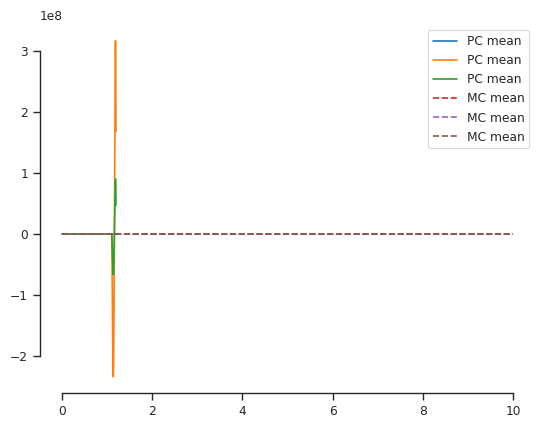

In [51]:
fig, ax = plt.subplots()
ax.plot(pc_sol.ts, pc_mean, label="PC mean")
ax.plot(pc_sol.ts, mc_mean, '--', label="MC mean")
ax.legend(loc="best")
sns.despine(trim=True);

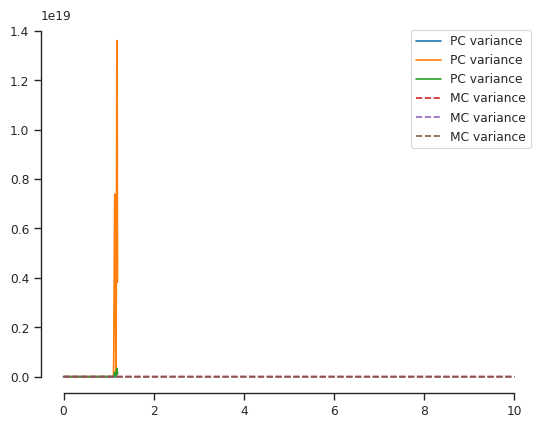

In [36]:
fig, ax = plt.subplots()
ax.plot(pc_sol.ts, pc_variance, label="PC variance")
ax.plot(pc_sol.ts, mc_var, '--', label="MC variance")
ax.legend(loc="best")
sns.despine(trim=True);

## Part B - Predictions

Generate three random initial conditions and propagate them forward in time using the surrogate. Plot only $x$ as a function of time for each initial condition. Compare to the ground truth.

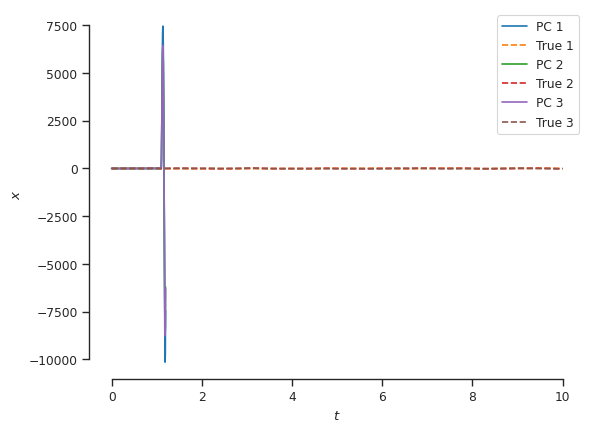

In [56]:
# Your code here
import numpy as np

ics = np.random.normal(0, 0.01, (3,3))
preds = surrogate(ics)

fig, ax = plt.subplots()

for i in range(len(ics[:,0])):
    ax.plot(pc_sol.ts, preds[i, :, 0], label=f"PC {i+1}")
    ax.plot(pc_sol.ts, true[i, :, 0], '--', label=f"True {i+1}")
    ax.legend(loc="best")
    ax.set_xlabel("$t$")
    ax.set_ylabel("$x$")
    plt.legend(loc="best")
sns.despine(trim=True);

## Part C - Probability Density Function

Use your surrogate to estimate the probability density function of $x$ at $t=1, 2, 5,$ and $10$.
Use different plots for each case.
You can do this, by generating $100,000$ initial conditions, propagating them forward through the surrogate and then plotting a histogram of the results.
Compare to Monte Carlo PDFs. Use transparency in your plots.

(100000, 2000, 3)


/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7065: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7066: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

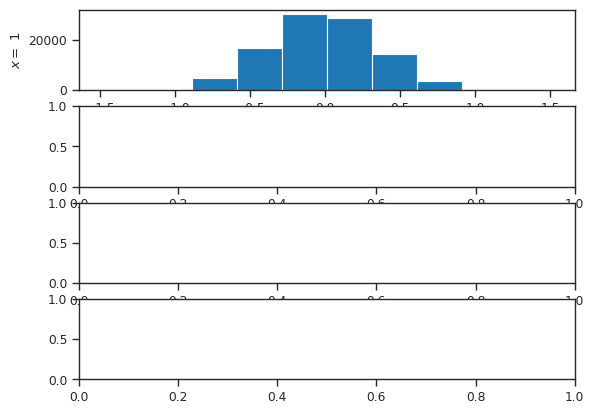

In [58]:
# Your code here

num_test = 100_000

ics = np.random.normal(0, 0.01, (num_test,3))
preds = surrogate(ics)

print(preds.shape)

t_stops = [200, 400, 1000, 2000]
times = [1, 2, 5, 10]

fig, ax = plt.subplots(4,1)

for i in range(len(t_stops)):
  ax[i].hist(preds[:,t_stops[i],0])
  ax[i].set_ylabel(f"$x =$ {times[i]}")